# Offline Analysis of Video Data 

In [1]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
prediction_result_filename = "prediction_results.pkl"

with open(prediction_result_filename, "rb") as f:
    data = pkl.load(f)

for key in data:
    print(key, ": ", len(data[key]))

keypoint_pos :  1408
prediction_label :  7
prediction_rsts :  1408
prediction_rsts_three_labels :  1408
prediction_rsts_final :  1408


## Some Constants

In [4]:
NUM_OF_FRAMES_PER_PRED = 45 # number of frames to make a gesture prediction

In [5]:
prediction_labels = data["prediction_label"]
print(prediction_labels)

['Clockwise', 'Counter Clockwise', 'Checkmark', 'Cross', 'Right', 'Left', 'None']


In [6]:
n_samples = len(data["keypoint_pos"])
time_stamp = np.arange(0, n_samples) / NUM_OF_FRAMES_PER_PRED
keypoint_x = np.asarray([x for x, _ in data["keypoint_pos"]], dtype=int)
keypoint_y = np.asarray([y for _, y in data["keypoint_pos"]], dtype=int)
prediction = np.asarray(data["prediction_rsts"], dtype=int)
prediction_label = [prediction_labels[i] for i in prediction]

df = pd.DataFrame({"time":time_stamp, "x":keypoint_x, "y":keypoint_y, "prediction":prediction, "label":prediction_label})
df

,time,x,y,prediction,label
0,0.000000,0,0,6,None
1,0.022222,843,369,6,None
2,0.044444,828,374,6,None
3,0.066667,797,389,6,None
4,0.088889,772,401,6,None
...,...,...,...,...,...
1403,31.177778,1181,180,2,Checkmark
1404,31.200000,1176,181,2,Checkmark
1405,31.222222,1169,182,2,Checkmark
1406,31.244444,1161,185,2,Checkmark


## visualize the label per time

<StemContainer object of 3 artists>

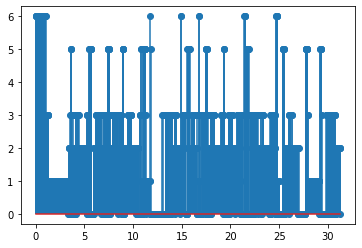

In [7]:
plt.stem(df['time'], df['prediction'])

In [9]:
%matplotlib inline
import numpy as np
  
# create data
x = data['true_label']
y = prediction
print(len(x), len(y))
# plot lines
plt.plot(x, np.arange(len(prediction)), label = "true")
plt.plot(y, np.arange(len(prediction)), label = "predict")
plt.legend()
plt.show()

KeyError: 'true_label'